In [2]:
#Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Exercice 0: MNIST dataset visualisation

In [6]:
# Chargement de l'ensemble de données MNIST
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

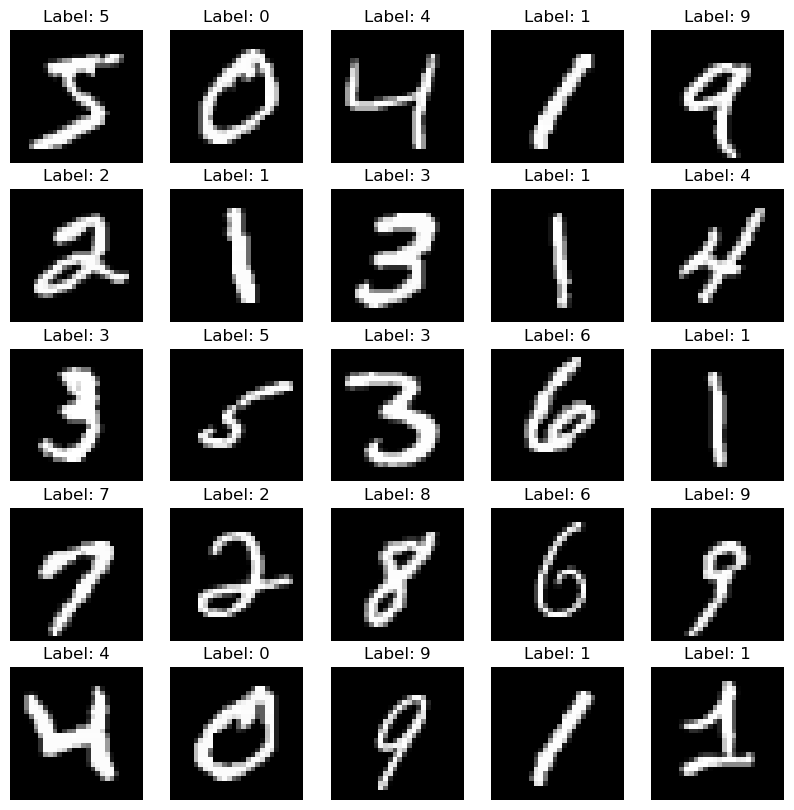

In [8]:
# Créer une nouvelle figure avec une taille de 10x10 pouces
plt.figure(figsize=(10, 10))

# Utiliser une boucle pour itérer sur les 25 premières images d'entraînement
for i in range(25):
    # Créer une sous-figure avec un espace de grille de 5x5 et l'index i+1
    plt.subplot(5, 5, i+1)
    
    # Afficher l'image d'entraînement actuelle en utilisant une colormap en niveaux de gris
    plt.imshow(X_train[i], cmap='gray')
    
    # Ajouter un titre à la sous-figure indiquant l'étiquette de l'image d'entraînement
    plt.title(f"Label: {Y_train[i]}")
    
    # Désactiver les axes de la sous-figure
    plt.axis('off')

# Afficher la figure complète
plt.show()       

# Exercice 1 : Classification d'images avec les réseaux neuronaux convolutifs (CNNs)
# Objectif : Comprendre comment les blocs de base d'un réseau neuronal convolutionnel pour la classification d'images sont utilisés.

# former des neurones convolutifs pour classer les images.

In [10]:
# Création d'un modèle séquentiel
model = models.Sequential([
    # Ajout d'une couche de convolution avec 32 filtres de taille 3x3 et une fonction d'activation ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # Ajout d'une couche de pooling pour réduire la dimensionnalité spatiale
    layers.MaxPooling2D((2, 2)),
    
    # Aplatir les données en un vecteur 1D
    layers.Flatten(),
    
    # Ajout d'une couche dense avec 10 neurones et une fonction d'activation softmax
    layers.Dense(10, activation='softmax')
])

In [12]:
# Compilation du modèle avec l'optimiseur Adam, la fonction de perte 'sparse_categorical_crossentropy' et la métrique 'accuracy'
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Remodeler les données pour les réseaux de neurones convolutifs (CNN)
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
# Normaliser les valeurs des images en les divisant par 255.0
X_train, X_test = X_train / 255.0, X_test / 255.0

Les valeurs des pixels des images d'entraînement (X_train) et des images de test 
(X_test) sont normalisées pour qu'elles soient comprises entre 0 et 1.
La division par 255.0 est utilisée pour effectuer cette normalisation. En divisant chaque valeur de pixel par 255.0,
les valeurs de pixel sont ramenées à une échelle de 0 à 1, où 0 représente le noir et 1 représente le blanc.

In [18]:
# Entraîner le modèle en utilisant les images d'entraînement et les étiquettes d'entraînement pendant 5 epochs
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 19s 10ms/step - loss: 0.2084 - accuracy: 0.9403
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0775 - accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0583 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0488 - accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0412 - accuracy: 0.9873


"""
1875/1875: Indique le nombre total de lots (batches) utilisés pour l'entraînement. 
Dans cet exemple, il y a 1875 lots d'entraînement.
- 8s 4ms/step: Indique que chaque lot a pris environ 8 secondes pour être traité, avec un temps moyen de 4 millisecondes par lot.
- loss: 0.0448: La valeur de la fonction de perte (loss) sur l'ensemble de données d'entraînement. 
Elle diminue idéalement à mesure que le modèle s'améliore.
- accuracy: 0.9863: La précision (accuracy) du modèle sur l'ensemble de données d'entraînement. 
Dans cet exemple, le modèle atteint une précision d'environ 98.63% sur les données d'entraînement à la fin de l'époque (epoch) 5.
"""

"""
L'indication "accuracy: 0.9863" signifie que, à la fin de l'entraînement du modèle pendant les cinq époques,
la précision (accuracy) du modèle sur l'ensemble de données d'entraînement est d'environ 98.63%. 
Cette valeur représente la proportion d'images correctement classifiées par le modèle parmi l'ensemble total des images d'entraînement.

Plus précisément, la précision est calculée comme le nombre total d'images correctement classifiées divisé par le nombre total d'images
dans l'ensemble de données. Dans ce cas, le modèle a réussi à attribuer correctement la classe prédite à environ 98.63% des images d'entraînement.
"""

In [20]:
# Évaluer le modèle sur les images de test
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0510 - accuracy: 0.9839
Test Accuracy: 0.9839000105857849


"""
Ceci est une confirmation de la précision obtenue sur l'ensemble de test. 
En général, une précision élevée sur l'ensemble de test indique que le modèle a appris à 
généraliser à de nouvelles données qui n'ont pas été utilisées pendant l'entraînement.
"""

In [22]:
# Faire des prédictions sur les images de test
predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [24]:
# Obtenir les étiquettes prédites en utilisant l'indice de la classe avec la plus haute probabilité
Y_predicted = np.argmax(predictions, axis=1)

# Calculer la précision en comparant les étiquettes réelles avec les étiquettes prédites
accuracy = accuracy_score(Y_test, Y_predicted)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9839


# On obtient une precision de 98,39% qui est une bonne capacité à classier correctement les image

In [27]:
# Calculer la précision en comparant les étiquettes réelles avec les étiquettes prédites
precision = precision_score(Y_test, Y_predicted, average='weighted')
print(f"Precision: {precision}")

Precision: 0.9839649962481483


In [31]:
# Calculer le rappel en comparant les étiquettes réelles avec les étiquettes prédites
recall = recall_score(Y_test, Y_predicted, average='weighted')
print(f"Rappel: {recall}")

Rappel: 0.9839


In [33]:
conf_matrice = confusion_matrix(Y_test, Y_predicted)
print("Matrice de Confusion:")
print(conf_matrice)

Matrice de Confusion:
[[ 971    0    1    0    1    2    1    2    2    0]
 [   0 1132    1    2    0    0    0    0    0    0]
 [   0    6 1014    4    1    0    0    6    1    0]
 [   0    0    1 1000    0    5    0    2    2    0]
 [   0    0    0    0  978    0    2    0    1    1]
 [   1    0    1    5    0  881    3    0    0    1]
 [   5    3    0    0    2    3  943    1    1    0]
 [   0    6    9    3    1    0    0 1007    1    1]
 [   5    0    4    5    3    3    2    4  943    5]
 [   1    5    0    4   11    9    0    7    2  970]]


In [35]:
from sklearn.metrics import classification_report
# Générer le rapport de classification en comparant les étiquettes réelles avec les étiquettes prédites
class_report = classification_report(Y_test, Y_predicted)
print("Report de classification:")
print(class_report)

Report de classification:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Précision (Precision):
En général : La précision est élevée pour toutes les classes, ce qui indique que le modèle a tendance à donner relativement peu de faux positifs. Il a une bonne capacité à ne pas classer à tort des exemples n'appartenant pas à une classe comme appartenant à cette classe.

Classes 0, 1, et 6 : Ces classes ont des précisions particulièrement élevées (0.98, 0.99, et 0.99 respectivement), ce qui suggère que le modèle est très précis lorsqu'il prédit ces chiffres.

Recall (Rappel):
En général : Le rappel est également élevé pour toutes les classes. Cela indique que le modèle a tendance à bien capturer la majorité des exemples appartenant à une classe donnée.

Classes 8 et 9 : Ces classes ont des rappels légèrement plus bas (0.97 et 0.96 respectivement), ce qui signifie que le modèle manque quelques exemples réels de ces classes.

F1-Score:
En général : Le F1-score (moyenne harmonique de la précision et du rappel) est élevé pour toutes les classes, ce qui est une bonne indication de l'équilibre entre la précision et le rappel.
Accuracy (Exactitude):
Accuracy globale : L'accuracy globale est de 0.98, ce qui est élevé. Cela signifie que le modèle a correctement classifié environ 98% des exemples dans l'ensemble de test.
Macro et Weighted Avg:
Macro Avg : C'est la moyenne non pondérée des métriques de chaque classe. Ici, la macro avg est également de 0.98, montrant une performance globale solide.

Weighted Avg : C'est la moyenne pondérée des métriques de chaque classe par le nombre d'exemples dans chaque classe. La weighted avg est également de 0.98, indiquant que la performance du modèle est stable même si les classes ont des tailles différentes.

In [37]:
# Trouver l'index de la première prédiction incorrecte
wrong_index = np.where(np.argmax(predictions, axis=1) != Y_test)[0][0]

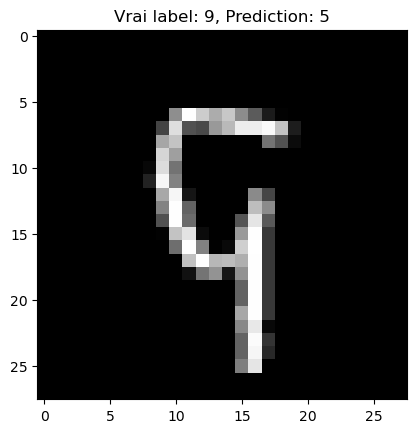

In [39]:
# Afficher l'image avec sa véritable étiquette et la prédiction du modèle
plt.figure()
plt.imshow(X_test[wrong_index].reshape(28, 28), cmap='gray')
plt.title(f"Vrai label: {Y_test[wrong_index]}, Prediction: {np.argmax(predictions[wrong_index])}")
plt.show()

 "Vrai label: 9, Prediction: 5", cela signifie que l'image correspond à la classe 9 selon l'étiquette réelle, mais le modèle a prédit la classe 5.
Cela indique une erreur de prédiction pour cette image particulière. Lorsque le modèle produit une prédiction différente de l'étiquette réelle, cela signifie qu'il a fait une erreur sur cette instance spécifique. L'analyse d'erreurs comme celle-ci peut être utile pour comprendre les faiblesses du modèle et pour identifier des cas particuliers où il a du mal à généraliser correctement.

# Exercice 2 : Classification d'images avec les réseaux de neurones convolutifs (CNN) : analyse

# Objectif : Analyser l'impact des différents hyperparamètres ou des éléments de l'architecture 
# du réseau sur la performance de la classification ou le temps d'apprentissage.

In [42]:
#Définir un nouvel optimiseur avec un taux d'apprentissage différent
new_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [44]:
# Définition du modèle de réseau de neurones convolutif modifié
model_lr_modified = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [46]:
# Compilation du modèle avec un nouvel optimiseur, une fonction de perte et des métriques
model_lr_modified.compile(optimizer=new_optimizer,
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [48]:
#Entraîner le modèle avec le taux d'apprentissage modifié
model_lr_modified.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5767 - accuracy: 0.8589
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2779 - accuracy: 0.9199
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2316 - accuracy: 0.9338
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1960 - accuracy: 0.9444
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1676 - accuracy: 0.9528


In [50]:
#Évaluer le modèle avec l'apprentissage modifié
test_loss_lr, test_acc_lr = model_lr_modified.evaluate(X_test, Y_test)
print(f"Précision des tests avec taux d'apprentissage modifié: {test_acc_lr}")

313/313 [==============================] - 2s 5ms/step - loss: 0.1529 - accuracy: 0.9574
Précision des tests avec taux d'apprentissage modifié: 0.9574000239372253


In [52]:
# 2. Ajouter des couches convolutives, des couches dropout layers et des couches entièrement connectées.
model_extended = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [54]:
#Compiler le modèle étendu
model_extended.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [56]:
# entrainer le modèle étendu
model_extended.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.2465 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1025 - accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0839 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0702 - accuracy: 0.9785
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0644 - accuracy: 0.9800


In [58]:
# Evaluer le modèle étendu
test_loss_extended, test_acc_extended = model_extended.evaluate(X_test, Y_test)
print(f"Test Accuracy avec plus couches: {test_acc_extended}")


313/313 [==============================] - 2s 7ms/step - loss: 0.0259 - accuracy: 0.9908
Test Accuracy avec plus couches: 0.9908000230789185


# accuracy: 0.9908 soit 99% de precision.

In [63]:
# 3. Modifier les paramètres de la convolution (stride, padding, activation)
model_modified_conv = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2, 2), padding='valid'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [65]:
# Compiler le modèle convolutionnel modifié
model_modified_conv.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

In [67]:
# Entraînement du modèle de convolution modifié
model_modified_conv.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3515 - accuracy: 0.8997
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1418 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1081 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0904 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0796 - accuracy: 0.9765


In [72]:
# Évaluation du modèle de convolution modifié
test_loss_conv, test_acc_conv = model_modified_conv.evaluate(X_test, Y_test)
print(f"Précision des tests avec des paramètres convolutifs modifiés: {test_acc_conv}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9766
Précision des tests avec des paramètres convolutifs modifiés: 0.9765999913215637


- **"Loss: 0.0732 - Accuracy: 0.9766:***

"Loss" (perte) La perte est de 0.0732, ce qui suggère que le modèle commet une erreur moyenne relativement faible lors de la prédiction.
"Accuracy" (précision)  Une précision de 0.9766 signifie que le modèle a correctement prédit les étiquettes de classe pour environ 97,66% des échantillons de test.
- ***Précision des tests avec des paramètres convolutifs modifiés: 0.9765999913215637:***

La valeur "0.9765999913215637" est la précision du modèle, ce qui confirme le pourcentage d'échantillons correctement classés, comme indiqué précédemment.

# Exercice 3: More image datasets

In [74]:
# Chargement de l'ensemble de données CIFAR-10
(X_train_cifar10, Y_train_cifar10), (X_test_cifar10, Y_test_cifar10) = datasets.cifar10.load_data()

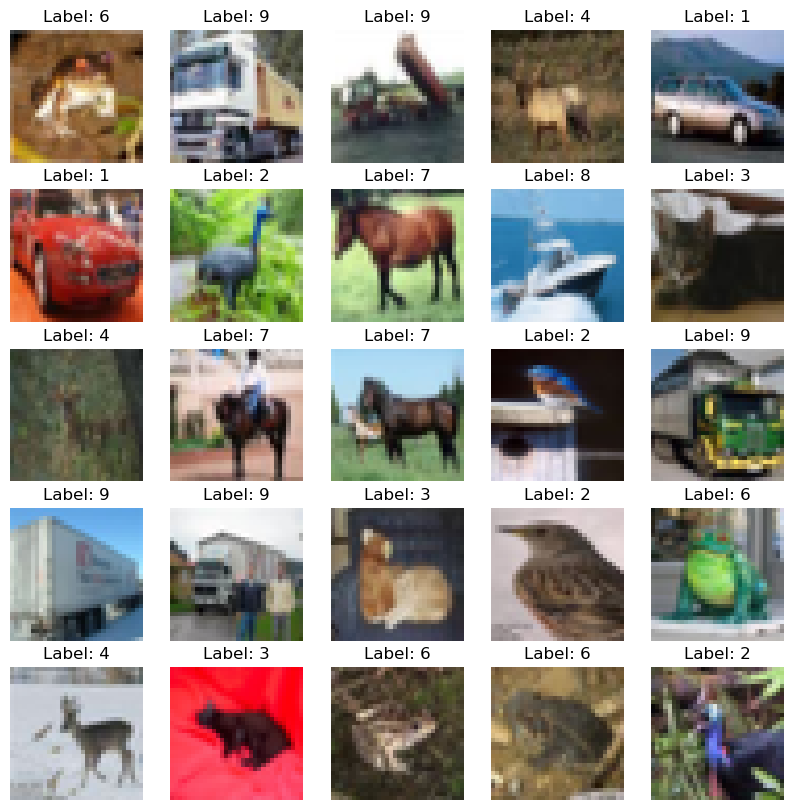

In [76]:
# Visualisation de quelques images de CIFAR-10
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train_cifar10[i])
    plt.title(f"Label: {Y_train_cifar10[i][0]}")
    plt.axis('off')
plt.show()

In [78]:
# Exercice 1 : Classification d'images avec des CNN sur CIFAR-10
# Chargement du modèle CNN d'exemple pour CIFAR-10
model_cifar10 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [80]:
# Compilation du modèle pour CIFAR-10
model_cifar10.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [82]:
# Normalisation des valeurs de pixels pour qu'elles soient entre 0 et 1 
X_train_cifar10, X_test_cifar10 = X_train_cifar10 / 255.0, X_test_cifar10 / 255.0

Les valeurs des pixels des images d'entraînement (X_train_cifar10) et des images de test 
(X_test_cifar10) sont normalisées pour qu'elles soient comprises entre 0 et 1.
La division par 255.0 est utilisée pour effectuer cette normalisation. En divisant chaque valeur de pixel par 255.0,
les valeurs de pixel sont ramenées à une échelle de 0 à 1, où 0 représente le noir et 1 représente le blanc.

In [84]:
# Entraînement du modèle sur CIFAR-10
model_cifar10.fit(X_train_cifar10, Y_train_cifar10, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4833 - accuracy: 0.4778
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2141 - accuracy: 0.5785
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1117 - accuracy: 0.6175
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0466 - accuracy: 0.6371
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9966 - accuracy: 0.6566


Époques (Epochs): Nous avons effectué 5 époques d'entraînement. Chaque époque représente une passe complète à travers l'ensemble de données d'entraînement.

Durée de chaque époque : Chaque époque a pris environ 8 à 9 secondes, avec une moyenne de 5 millisecondes par étape.

Perte (Loss) et Précision (Accuracy) :

À la fin de chaque époque, le modèle a atteint une certaine valeur de perte (loss) et une précision (accuracy) sur l'ensemble de données d'entraînement.
La perte diminue d'une époque à l'autre, ce qui est souhaitable. La précision, quant à elle, augmente, indiquant que le modèle s'améliore au fil des époques.


Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9514 - accuracy: 0.6716
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9137 - accuracy: 0.6861
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8849 - accuracy: 0.6958
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8563 - accuracy: 0.7052
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8272 - accuracy: 0.7151


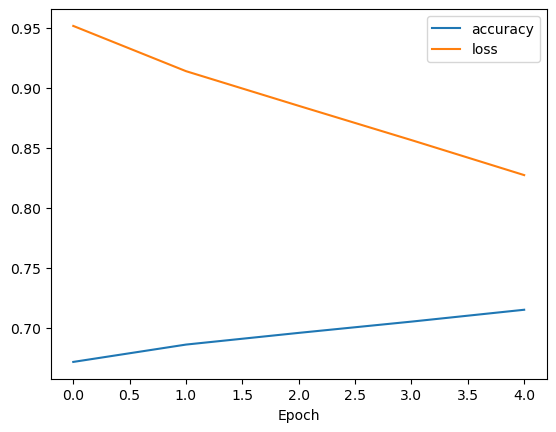

In [86]:
# Accéder à l'historique
history = model_cifar10.fit(X_train_cifar10, Y_train_cifar10, epochs=5)

# Visualiser les courbes d'apprentissage
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# lorqu'on observe le graphique, on voit clairement que la precision augmente progressivement et la fonction perte diminue d'une epoque à l'autre

In [90]:
# Évaluation du modèle sur l'ensemble de test CIFAR-10
test_loss_cifar10, test_acc_cifar10 = model_cifar10.evaluate(X_test_cifar10, Y_test_cifar10)
print(f"Précision du test CIFAR-10 : {test_acc_cifar10}")

313/313 [==============================] - 1s 3ms/step - loss: 1.0919 - accuracy: 0.6333
Précision du test CIFAR-10 : 0.6333000063896179


In [92]:
predictions_cifar10 =  model_cifar10.predict(X_test_cifar10)
Y_predicted_cifar10 = np.argmax(predictions_cifar10, axis=1)
 
# Calculer la précision cifar10
accuracy_cifar10 = accuracy_score(Y_test_cifar10, Y_predicted_cifar10)
print(f"Accuracy: {accuracy_cifar10}")

313/313 [==============================] - 1s 3ms/step
Accuracy: 0.6333


In [94]:
# Générer le rapport de classification en comparant les étiquettes réelles avec les étiquettes prédites
class_report_cifar10 = classification_report(Y_test_cifar10, Y_predicted_cifar10)
print("Report de classification:")
print(class_report_cifar10)

Report de classification:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62      1000
           1       0.73      0.78      0.75      1000
           2       0.43      0.55      0.48      1000
           3       0.53      0.38      0.44      1000
           4       0.56      0.62      0.59      1000
           5       0.56      0.55      0.55      1000
           6       0.78      0.69      0.73      1000
           7       0.64      0.78      0.70      1000
           8       0.78      0.71      0.74      1000
           9       0.67      0.76      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



Précision (Precision):
En général : La précision varie selon les classes, mais en moyenne, elle est d'environ 65%. Cela indique que le modèle a tendance à donner relativement peu de faux positifs, mais il y a des variations significatives entre les classes.

Classes 1, 6, et 7 : Ces classes ont des précisions particulièrement élevées (0.78, 0.78, et 0.81 respectivement), suggérant que le modèle est relativement précis lorsqu'il prédit ces classes.

Recall (Rappel):
En général : Le rappel varie également, avec une moyenne d'environ 63%. Cela indique que le modèle capture la majorité des exemples appartenant à une classe donnée, mais il y a des variations significatives entre les classes.

Classes 0, 1, 4, 6, 8, et 9 : Ces classes ont des rappels relativement élevés, suggérant que le modèle parvient à bien identifier la plupart des exemples de ces classes.

F1-Score:
En général : Le F1-score (moyenne harmonique de la précision et du rappel) est d'environ 64%, indiquant un équilibre entre la précision et le rappel.
Accuracy (Exactitude):
Accuracy globale : L'accuracy globale est d'environ 63%, ce qui signifie que le modèle a correctement classifié environ 63% des exemples dans l'ensemble de test.
Macro et Weighted Avg:
Macro Avg : C'est la moyenne non pondérée des métriques de chaque classe. Ici, la macro avg est d'environ 64%, montrant une performance globale acceptable.

Weighted Avg : C'est la moyenne pondérée des métriques de chaque classe par le nombre d'exemples dans chaque classe. La weighted avg est également d'environ 64%, indiquant que la performance du modèle est stable même si les classes ont des tailles différentes.

In [121]:
# Charger l'ensemble de données CIFAR-100
(X_train_cifar100, Y_train_cifar100), (X_test_cifar100, Y_test_cifar100) = datasets.cifar100.load_data()

# Exercice 2 : Classification d'images avec des CNN sur CIFAR-100

In [123]:
# Exercice 2 : Classification d'images avec des CNN sur CIFAR-100
# Chargement du modèle CNN d'exemple pour CIFAR-100
model_cifar100 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='softmax')  # CIFAR-100 a 100 classes
])

In [125]:
# Compilation du modèle pour CIFAR-100
model_cifar100.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [127]:
# Normalisation des valeurs de pixels pour qu'elles soient entre 0 et 1
X_train_cifar100, X_test_cifar100 = X_train_cifar100 / 255.0, X_test_cifar100 / 255.0

Les valeurs des pixels des images d'entraînement (X_train_cifar100) et des images de test 
(X_test_cifar100) sont normalisées pour qu'elles soient comprises entre 0 et 1.
La division par 255.0 est utilisée pour effectuer cette normalisation. En divisant chaque valeur de pixel par 255.0,
les valeurs de pixel sont ramenées à une échelle de 0 à 1, où 0 représente le noir et 1 représente le blanc.

In [148]:
#Entraîner le modè
model_cifar100.fit(X_train_cifar100, Y_train_cifar100, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3458 - accuracy: 0.6311
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3011 - accuracy: 0.6443
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2584 - accuracy: 0.6559
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2240 - accuracy: 0.6613
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1837 - accuracy: 0.6708


In [150]:
# Évaluation du modèle sur l'ensemble de test CIFAR-100
test_loss_cifar100, test_acc_cifar100 = model_cifar100.evaluate(X_test_cifar100, Y_test_cifar100)
print(f"Précision du test CIFAR-100 : {test_acc_cifar100}")

313/313 [==============================] - 1s 4ms/step - loss: 3.5849 - accuracy: 0.3407
Précision du test CIFAR-100 : 0.3407000005245209


In [154]:
# 2. Ajouter plus de couches de convolution
model_cifar100 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='softmax')
])

In [158]:
#Compliler et entrainer le model
model_cifar100.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_cifar100.fit(X_train_cifar100, Y_train_cifar100, epochs=10, validation_data=(X_test_cifar100, Y_test_cifar100))

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.6106 - accuracy: 0.3602 - val_loss: 2.7907 - val_accuracy: 0.3265
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3877 - accuracy: 0.4042 - val_loss: 2.7008 - val_accuracy: 0.3496
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2126 - accuracy: 0.4412 - val_loss: 2.6769 - val_accuracy: 0.3591
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0695 - accuracy: 0.4718 - val_loss: 2.6650 - val_accuracy: 0.3698
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9405 - accuracy: 0.4996 - val_loss: 2.7285 - val_accuracy: 0.3634
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8344 - accuracy: 0.5242 - val_loss: 2.7771 - val_accuracy: 0.3630
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7333 - accuracy: 0.5454 - val_loss: 2.7994 -

In [160]:
# 3. Ajouter plus de couches Dropout
model_cifar100 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(100, activation='softmax')
])

model_cifar100.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_cifar100.fit(X_train_cifar100, Y_train_cifar100, epochs=10, validation_data=(X_test_cifar100, Y_test_cifar100))

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 3.4842 - accuracy: 0.1980 - val_loss: 3.0774 - val_accuracy: 0.2792
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 2.7838 - accuracy: 0.3310 - val_loss: 2.9395 - val_accuracy: 0.3098
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.5153 - accuracy: 0.3857 - val_loss: 2.8901 - val_accuracy: 0.3196
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3223 - accuracy: 0.4233 - val_loss: 2.8970 - val_accuracy: 0.3236
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.1515 - accuracy: 0.4600 - val_loss: 2.9016 - val_accuracy: 0.3307
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9950 - accuracy: 0.4952 - val_loss: 2.8878 - val_accuracy: 0.3367
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8704 - accuracy: 0.5214 - val_loss: 2.9003 -

In [162]:
# 4. Modifier les paramètres de convolution
model_cifar100 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='softmax')
])

model_cifar100.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_cifar100.fit(X_train_cifar100, Y_train_cifar100, epochs=10, validation_data=(X_test_cifar100, Y_test_cifar100))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 3.5672 - accuracy: 0.1821 - val_loss: 3.1538 - val_accuracy: 0.2563
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8950 - accuracy: 0.3065 - val_loss: 2.9470 - val_accuracy: 0.3006
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.6721 - accuracy: 0.3494 - val_loss: 2.8677 - val_accuracy: 0.3121
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5263 - accuracy: 0.3803 - val_loss: 2.8396 - val_accuracy: 0.3271
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.4142 - accuracy: 0.4046 - val_loss: 2.8146 - val_accuracy: 0.3338
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3104 - accuracy: 0.4286 - val_loss: 2.7877 - val_accuracy: 0.3339
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2184 - accuracy: 0.4480 - val_loss: 2.8004 - val_accuracy:

In [164]:
from keras.callbacks import EarlyStopping
model_cifar100 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Ajouter une couche dense
    layers.Dense(100, activation='softmax')
    
])
# Compile the model
model_cifar100.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_cifar100.fit(X_train_cifar100, Y_train_cifar100, epochs=10,
                   validation_data=(X_test_cifar100, Y_test_cifar100),
                   callbacks=[early_stopping])


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 3.7001 - accuracy: 0.1390 - val_loss: 3.2769 - val_accuracy: 0.2155
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.0030 - accuracy: 0.2602 - val_loss: 2.9359 - val_accuracy: 0.2784
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7209 - accuracy: 0.3184 - val_loss: 2.7634 - val_accuracy: 0.3132
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5284 - accuracy: 0.3547 - val_loss: 2.6795 - val_accuracy: 0.3328
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3801 - accuracy: 0.3893 - val_loss: 2.5910 - val_accuracy: 0.3497
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2556 - accuracy: 0.4155 - val_loss: 2.5899 - val_accuracy: 0.3502
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1480 - accuracy: 0.4391 - val_loss: 2.5594 - val_accuracy:

In [166]:
# Évaluation du modèle sur l'ensemble de test CIFAR-100
test_loss_cifar100, test_acc_cifar100 = model_cifar100.evaluate(X_test_cifar100, Y_test_cifar100)
print(f"Précision du test CIFAR-100 : {test_acc_cifar100}")

313/313 [==============================] - 1s 3ms/step - loss: 2.5591 - accuracy: 0.3746
Précision du test CIFAR-100 : 0.37459999322891235


Apres avoir ajouter de nouveaux paramettre et augmenté le nombre d'époque, la la precision est toujours inferieure à 40 %